In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from datetime import timedelta
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
%matplotlib inline

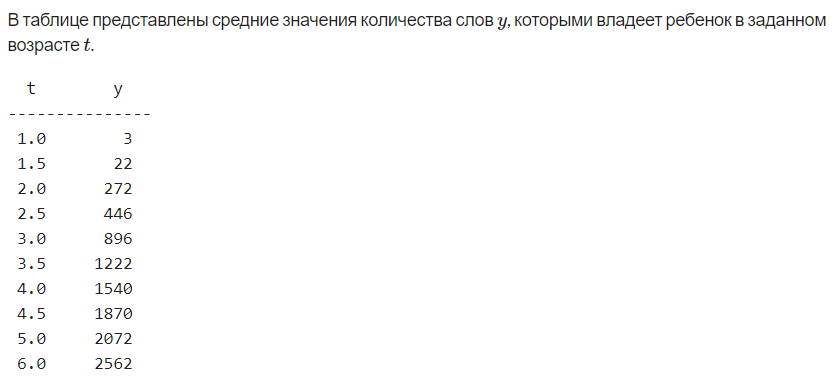

In [2]:
ages = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0]
n_words = [3, 22, 272, 446, 896, 1222, 1540, 1870, 2072, 2562]

length = len(ages)

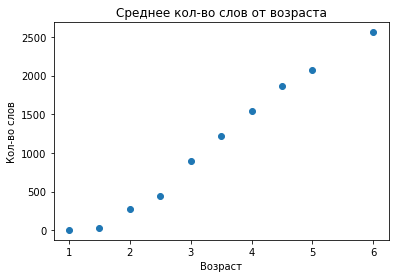

In [3]:
plt.xlabel("Возраст")
plt.ylabel("Кол-во слов")
plt.title("Среднее кол-во слов от возраста")
plt.scatter(ages, n_words, label = 'Исходные данные')

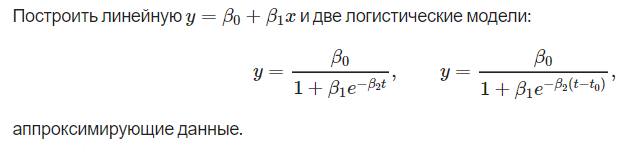

## Линнейная аппроскимация 

In [4]:
x = np.array(ages)
y = np.array(n_words)

mx = x.sum()/length
my = y.sum()/length
a2 = np.dot(x.T, x)/length
a11 = np.dot(x.T, y)/length
 
beta1_lin = (a11 - mx*my)/(a2 - mx**2)
beta0_lin = my - beta1_lin *mx

print("beta0_lin = "+str(beta0_lin))
print("beta1_lin = "+str(beta1_lin))

beta0_lin = -763.8571428571427
beta1_lin = 561.9264069264069


In [5]:
def linear(x):
    return beta1_lin * x + beta0_lin

[ 561.92640693 -763.85714286]


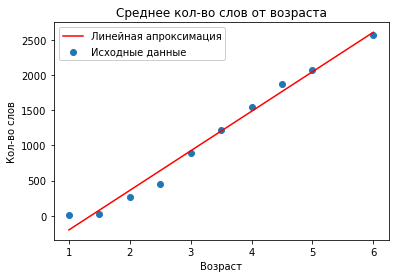

In [6]:
x_linear = np.linspace(1.0, 6.0, 100)
y_linear = linear(x_linear)

plt.xlabel("Возраст")
plt.ylabel("Кол-во слов")
plt.title("Среднее кол-во слов от возраста")
plt.scatter(x, y, label = 'Исходные данные')
plt.plot(x_linear, y_linear, 'r', label = 'Линейная апроксимация')
plt.legend(loc = 'best', framealpha = 1)

# Полином 1й степени что бы проверить вычисления
p = np.polyfit(x, y, 1)
print(p)
# ya = np.polyval(p, ages)
# plt.plot(ages, ya, 'r', label = 'Линейная апроксимация REFERENCE')

## Первая логистическая модель

In [7]:
def logistic_1(t, beta0_log1, beta1_log1, beta2_log1):
    return beta0_log1 / (1. + beta1_log1 * np.exp(-beta2_log1 * t))

normalized_y = y / np.linalg.norm(y)

coeffs_logistic1, _ = opt.curve_fit(logistic_1, ages, normalized_y)

0.5947934763213071 95.7688174583142 1.23640630795842


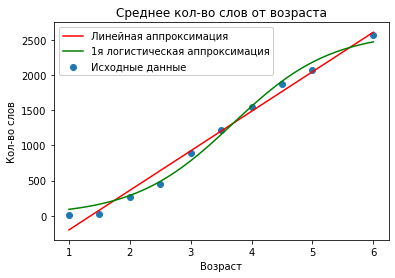

In [8]:
print(*coeffs_logistic1)

x_logistic1 = np.linspace(1.0, 6.0, 100)
y_logistic1 = logistic_1(x_logistic1, *coeffs_logistic1) * np.linalg.norm(n_words)

plt.xlabel("Возраст")
plt.ylabel("Кол-во слов")
plt.title("Среднее кол-во слов от возраста")
plt.scatter(x, y, label = 'Исходные данные')
plt.plot(x_linear, y_linear, 'r', label = 'Линейная аппроксимация')
plt.plot(x_logistic1, y_logistic1, 'g', label = '1я логистическая аппроксимация')
plt.legend(loc = 'best', framealpha = 1)

## Вторая логистическая модель

In [9]:
def logistic_2(t, beta0_log1, beta1_log1, beta2_log1, t0):
    return beta0_log1 / (1. + beta1_log1 * np.exp(-beta2_log1 * (t - t0)))

coeffs_logistic2, _ = opt.curve_fit(logistic_2, x, normalized_y, method="trf")

0.5947931514381785 1.5877046990341595 1.2364078815329964 3.3157743530093557


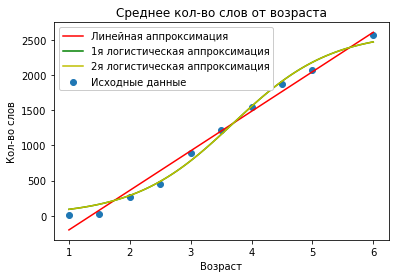

In [10]:
print(*coeffs_logistic2)

x_logistic2 = np.linspace(1.0, 6.0, 100)
y_logistic2 = logistic_2(x_logistic2, *coeffs_logistic2) * np.linalg.norm(n_words)

plt.xlabel("Возраст")
plt.ylabel("Кол-во слов")
plt.title("Среднее кол-во слов от возраста")
plt.scatter(x, y, label = 'Исходные данные')
plt.plot(x_linear, y_linear, 'r', label = 'Линейная аппроксимация')
plt.plot(x_logistic1, y_logistic1, 'g', label = '1я логистическая аппроксимация')
plt.plot(x_logistic2, y_logistic2, 'y', label = '2я логистическая аппроксимация')
plt.legend(loc = 'best', framealpha = 1)

In [11]:
res_linear    = linear(x)
res_logistic1 = logistic_1(x, *coeffs_logistic1) * np.linalg.norm(n_words)
res_logistic2 = logistic_2(x, *coeffs_logistic2) * np.linalg.norm(n_words)

In [18]:
import sklearn
mean_abs_error_linear     = sklearn.metrics.mean_squared_error(res_linear, y)
mean_abs_error_logistic1  = sklearn.metrics.mean_squared_error(res_logistic1, y)
mean_abs_error_logistic2  = sklearn.metrics.mean_squared_error(res_logistic2, y)

print("Mean ABS error fpr linear = "    + str(mean_abs_error_linear))
print("Mean ABS error fpr logistic1 = " + str(mean_abs_error_logistic1))
print("Mean ABS error fpr logistic2 = " + str(mean_abs_error_logistic2))


Mean ABS error fpr linear = 10903.277489177488
Mean ABS error fpr logistic1 = 6971.830188086288
Mean ABS error fpr logistic2 = 6971.830189836282


Рассматривая полученные графики и среднеквадратическую ошибку аппроксимации можно сделать вывод, что:

* Аппроксимация логистической функцией работает лучше (что очевидно), но на используемых данных ошибка не сильно велика, как могло бы быть на менее упорядоченных данных с менее выраженой линейной зависимостью.
* Графики двух логистических функций практически идентичны. Дополнительный параметр логистической функции t0, которых является средней точнкой логистической функции, не меняет точность аппроксимации.
* Средняя абсолютная ошибка логистических аппроксимаций отличается в четвертом знаке полсле запятой, что является незначительным.